ベースラインのライトカーブとパラメータを与えて、人工のライトカーブを作る。

In [1]:
from matplotlib import rcParams
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 3
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import MulensModel as mm
import GenMockCurve as gmc
import subprocess

In [5]:
data_path = "../lcurve/gb5-R-8-5-271660.phot.cor"

mock = gmc.GenMockCurve()
mock.get_base_line(data_path)

mock.raw_data = mock.raw_data[np.where(mock.raw_data["time"]<5000)]

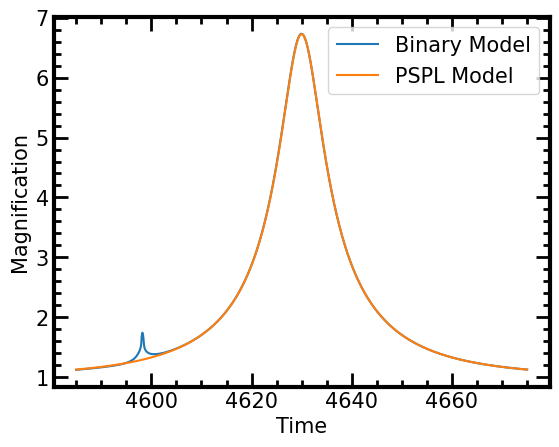

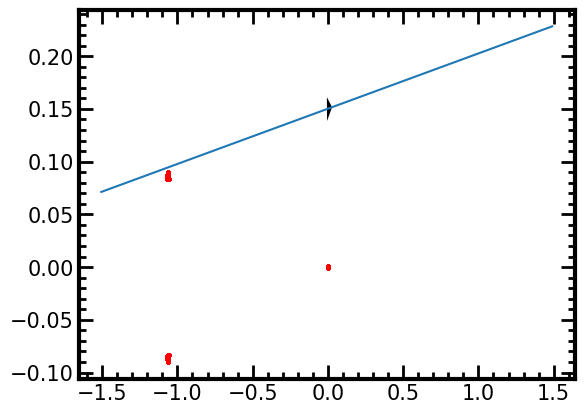

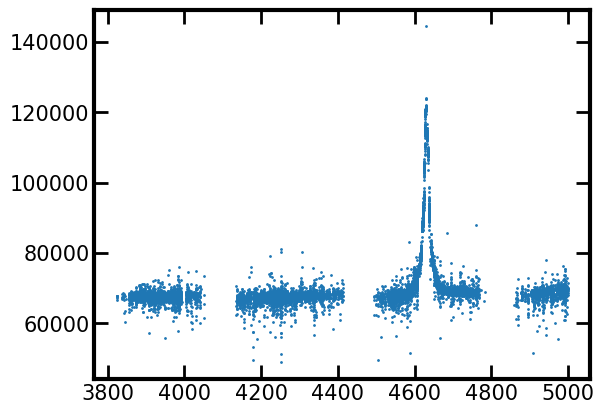

In [6]:
t0_in = 4630
u0_in=0.15
tE_in=30
rho_in=0.01
q_in = 0.001
s_in=0.6
alpha_in = 3


coeff=5
t_range = [t0_in-coeff*tE_in,t0_in+coeff*tE_in]
param_dict={'t_0': t0_in, 'u_0': u0_in, 't_E': tE_in,'rho': rho_in,'s':s_in,'q':q_in,'alpha':alpha_in}

mock.set_params(param_dict,coeff)


mock.plot_model()
plt.legend(loc='best')
plt.minorticks_on()
# plt.xlim(4580,4600)
plt.show()

mock.plot_caustic()
plt.minorticks_on()
plt.show()

mock.make_mock_flux(fs_in=10000)

plt.scatter(mock.mock_data.time,mock.mock_data.flux,s=1)
# plt.xlim(4250,4650)
plt.show()

In [ ]:
subprocess.run("rm -f -r ../tmp_mock_curve.dat", shell=True, check=False)
mock.output("../tmp_mock_curve.dat",subtract_median=True)